# Lab 2 - IA340

## View the Data

In [45]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-2025-fall-960915131/Electric_Vehicle_Population_Data.csv') # load the data from s3
df.head() #show the top 5 rows

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257635 entries, 0 to 257634
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         257635 non-null  object 
 1   County                                             257627 non-null  object 
 2   City                                               257627 non-null  object 
 3   State                                              257635 non-null  object 
 4   Postal Code                                        257627 non-null  float64
 5   Model Year                                         257635 non-null  int64  
 6   Make                                               257635 non-null  object 
 7   Model                                              257635 non-null  object 
 8   Electric Vehicle Type                              257635 non-null  object

In [7]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,257627.000000,257635.000000,257632.000000,257632.000000,257038.000000,2.576350e+05,2.576270e+05
mean,98177.614217,2021.713164,43.127775,705.270541,28.897151,2.404009e+08,5.297530e+10
std,2535.922185,3.023857,81.632805,6997.364357,14.882168,6.602927e+07,1.597188e+09
min,1469.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.134322e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.586345e+08,5.303303e+10
75%,98380.000000,2024.000000,35.000000,0.000000,42.000000,2.738272e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


In [8]:
df.shape

(257635, 17)

In [9]:
df.shape
df['City']

0               Yakima
1         Port Orchard
2             Lynnwood
3               Auburn
4         Mount Vernon
              ...     
257630        Mukilteo
257631        Kirkland
257632       Vancouver
257633      Bellingham
257634         Seattle
Name: City, Length: 257635, dtype: object

Markdown for View Data: There are 257,027 rows and 17 columns. 5 columns are floats and 2 are integer so there are 7 total numeric columns. The other 10 are text. First impression is that there are various descriptive columns about each car.

## Explore and Clean Data

In [10]:
df = df.rename(columns={"Electric Vehicle Type": "EV Type"}) #rename one column, renamed "Electric Vehicle Type" to "EV Type"
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,EV Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10


In [11]:
df= df.dropna() #drop nulls
df.isnull().sum() #check for null values

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
EV Type                                              0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

Markdown for Clean the Data: I renamed the column "Electric Vehicle Type" to "EV Type". I dropped all nulls before checking how many there originally were, but I checked after dropping them to make sure there were 0. 

## Manipulate the Data

In [12]:
df['City'] #shows just one column

0               Yakima
1         Port Orchard
2             Lynnwood
3               Auburn
4         Mount Vernon
              ...     
257630        Mukilteo
257631        Kirkland
257632       Vancouver
257633      Bellingham
257634         Seattle
Name: City, Length: 257027, dtype: object

In [13]:
df.sort_values(by='Electric Range') #sort/order data by column values

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,EV Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
117879,5YJ3E1EA5S,King,Redmond,WA,98052.0,2025,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,273975019,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
117896,7SAYGAEE1S,Snohomish,Lynnwood,WA,98037.0,2025,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,32.0,274099101,POINT (-122.27734 47.83785),PUGET SOUND ENERGY INC,5.306105e+10
117898,7SAYGDEEXP,King,Redmond,WA,98052.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,254092429,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
117885,5YJ3E1EB3S,Yakima,Yakima,WA,98902.0,2025,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,281764500,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
117886,7PDSGABA2P,King,Sammamish,WA,98075.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,276276955,POINT (-122.03539 47.61344),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19913,5YJSA1E41L,Spokane,Spokane,WA,99223.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,6.0,132182620,POINT (-117.36043 47.63396),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10
171519,5YJSA1E43L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,22.0,102849792,POINT (-122.75103 47.08149),PUGET SOUND ENERGY INC,5.306701e+10
69872,5YJSA1E43L,Grant,Quincy,WA,98848.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,13.0,278275833,POINT (-119.85338 47.23748),PUD NO 2 OF GRANT COUNTY,5.302501e+10
184661,5YJSA1E45L,Cowlitz,Longview,WA,98632.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,19.0,132280116,POINT (-122.95058 46.14681),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301500e+10


In [14]:
df[0:5] #slice by rows (shows first 5 rows)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,EV Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10


In [15]:
df[df['Electric Range']>5] #shows only rows where electric range > 5 (filtering with a condition)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,EV Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257626,5YJ3E1EB5L,Spokane,Spokane,WA,99212.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,4.0,4783222,POINT (-117.28805 47.68043),BONNEVILLE POWER ADMINISTRATION||VERA IRRIGATI...,5.306301e+10
257628,WP1AE2A27F,Snohomish,Mukilteo,WA,98275.0,2015,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,21.0,143946596,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,5.306104e+10
257630,2C4RC1L73L,Snohomish,Mukilteo,WA,98275.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,21.0,161576068,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,5.306104e+10
257632,WBAJB1C53K,Clark,Vancouver,WA,98683.0,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,55700.0,18.0,278137940,POINT (-122.49212 45.60365),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


Markdown for Manipulate the Data: I showed the column "City". I sorted values by the column "Electric Range". I sliced the first 5 rows. I filtered rows by the coniditon of "Elecric Range" > 5. 

## Group and Visualize the Data

In [29]:
modelyear_by_range = df.groupby('Model Year')['Electric Range'].sum()
modelyear_by_range.head()

Model Year
2000     464.0
2002      95.0
2003      95.0
2008    4180.0
2010    5100.0
Name: Electric Range, dtype: float64

<Axes: title={'center': 'Electric Range by Model Year'}, xlabel='Model Year', ylabel='Electric Range'>

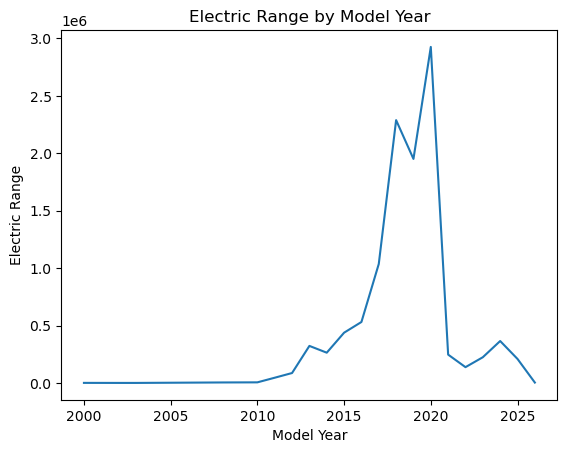

In [43]:
modelyear_by_range.plot.line(x='Model Year',ylabel='Electric Range', title='Electric Range by Model Year')

This graph displays on a line how each year of models is rated on the Electric Range scale. In other words it shows which years produce models of cars with higher electric capabilities. The graph shows logical results since the amount of elecric capability has steadily increased in the past decade, although the recent drop off is curious. 

In [36]:
ev_by_county = df.groupby('County')['VIN (1-10)'].count()
ev_by_county.head()

County
Adams        99
Asotin       99
Benton     3468
Chelan     1601
Clallam    1558
Name: VIN (1-10), dtype: int64

<Axes: title={'center': 'Number of Electric Vehicles by WA Counties'}, xlabel='County', ylabel='Number of Electric Vehicles'>

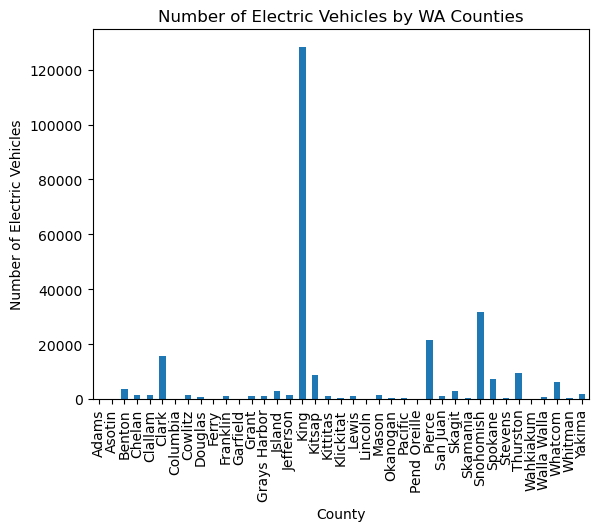

In [44]:
ev_by_county.plot.bar(x='County',ylabel='Number of Electric Vehicles', title = 'Number of Electric Vehicles by WA Counties')

This graph displays the count of electric vehicles in each county in the state of Washington. Evidently there is an absurd skew of EVs in King County for some reason. This could be worth exploring to either find the reason or error in the dataset showing such an absurd amount of EVs compared to other counties. 